In [44]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fontsize = 16


sns.set_context("paper", rc={
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize,
    "xtick.labelsize": fontsize,
    'ytick.labelsize': fontsize,
    'grid.linewidth': 1.5,
})
sns.set_style("ticks", {"xtick.major.size": 14, "ytick.major.size": 14})

plt.rc('font', family='Times New Roman', weight='bold', size=fontsize)
plt.rcParams.update(
    {'font.size': fontsize, "axes.grid": True, 'grid.linestyle': '-.'})

PATH = '../logs'

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

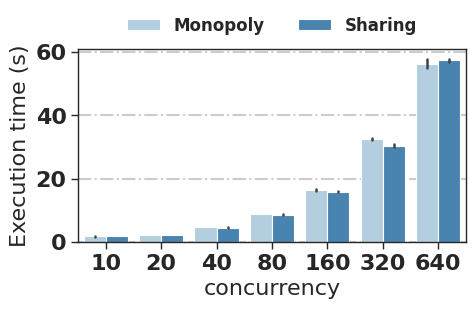

In [45]:
import re
import numpy as np
import string


def bar_plot(y, y_label):
    fig, ax1 = plt.subplots(figsize=(5, 2.5))
    sns.barplot(x="concurrency", y=y, hue="strategy",
                data=data, palette="Blues", order=sorted(data['concurrency'].unique()), 
                estimator=lambda x: np.quantile(x, 0.98))
    sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1),
                    ncol=4, title=None, frameon=False, fontsize=fontsize-4)
    ax1.set_ylabel(y_label)
    ax1.set_xlabel("concurrency")
    fig.show()


csvs = glob.glob(f"{PATH}/*_reqs.csv")

data = pd.DataFrame()
for csv in csvs:
    concurrency = re.findall(r"\d+\.?\d*", csv)[0]
    strategy = re.findall(r"(?<=\/)[a-z]*(?=_)", csv)[0]
    df = pd.read_csv(csv)
    
    df['concurrency'] = int(concurrency)
    df['strategy'] = strategy.capitalize()
    data = pd.concat([df, data])
if 'queue_time(ms)' in data.columns:
    data['exec_time(s)'] = (data['exec_time(ms)'] + data['queue_time(ms)'])/ 1000  # Converts ms to s
else: 
    data['exec_time(s)'] = data['exec_time(ms)']/ 1000  # Converts ms to s
bar_plot(y="exec_time(s)", y_label="Execution time (s)")

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

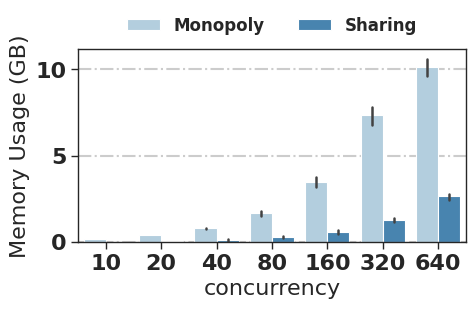

In [46]:

csvs = glob.glob(f"{PATH}/*_reqs_mem.csv")
data = pd.DataFrame()
for csv in csvs:
    concurrency = re.findall(r"\d+\.?\d*", csv)[0]
    strategy = re.findall(r"(?<=\/)[a-z]*(?=_)", csv)[0]
    df = pd.read_csv(csv)
    df['concurrency'] = int(concurrency)
    df['strategy'] = strategy.capitalize()
    data = pd.concat([df, data])
data
data['Mem_Util(0.01*MB)'] = data['Mem_Util(0.01*MB)'] - data['Mem_Util(0.01*MB)'].min()
data['Mem_Util(GB)'] = data['Mem_Util(0.01*MB)'] * 100 / 1024

y="Mem_Util(GB)"
y_label="Memory Usage (GB)"
fig, ax1 = plt.subplots(figsize=(5, 2.5))
sns.barplot(x="concurrency", y=y, hue="strategy", hue_order=data['strategy'].unique(),
            data=data, palette="Blues", order=sorted(data['concurrency'].unique()), 
            )
sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1),
                ncol=4, title=None, frameon=False, fontsize=fontsize-4)
ax1.set_ylabel(y_label)
ax1.set_xlabel("concurrency")
fig.show()
